In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random
import time

In [2]:
## Loading data
sediment = pd.read_csv('C:/2024 저널 논문/퇴적물측정망(231013)/Python code/sediment_read.csv', encoding='cp949')

In [3]:
sediment = sediment.dropna(axis=0).dropna(axis=1)

In [4]:
sediment

,region,spot,year,month,day,half,pollution,depth,WT,DO,...,Pb,Zn,Cu,Cr,Ni,As,Cd,Hg,Al,Li
0,Nakdong,거창위천2,2015,3,30,first,slightlybad,0.5,15,8.7,...,19.9,55.0,11.5,21.6,3.2,1.5,0.10,0.091,9.35,14.6
1,Geum,곡교천2,2015,3,31,first,slightlybad,1.0,16,6.3,...,29.6,259.9,104.9,90.4,35.0,6.7,0.55,0.093,10.77,33.9
2,Yeongsan,곡성,2015,3,26,first,normal,0.7,15,12.5,...,28.9,127.5,24.7,32.9,14.5,7.9,0.24,0.048,7.70,77.5
3,Nakdong,곤양천,2015,3,23,first,slightlybad,1.0,13,10.3,...,10.3,77.1,15.8,251.8,17.3,3.2,0.10,0.013,6.51,15.5
4,Yeongsan,광양서천,2015,3,30,first,slightlybad,0.7,16,11.1,...,44.1,237.7,45.1,45.7,20.6,10.0,0.58,0.041,9.36,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,Nakdong,연초댐1,2022,6,15,first,slightlybad,13.0,23,9.6,...,20.7,122.3,36.7,45.8,19.9,7.6,0.29,0.078,7.12,70.0
3202,Nakdong,영주댐1,2022,6,17,first,slightlybad,21.0,22,8.5,...,26.7,160.5,21.5,44.4,15.1,9.8,0.21,0.079,8.62,86.2
3203,Nakdong,영주댐2,2022,6,17,first,slightlybad,9.0,23,9.8,...,30.3,195.4,31.0,44.3,17.8,13.4,0.25,0.101,9.54,95.0
3204,Nakdong,영주댐3,2022,6,17,first,slightlybad,9.0,24,15.6,...,23.9,208.4,23.9,40.9,15.8,7.8,0.22,0.070,9.86,77.0


In [5]:
## Divide train and test
sediment_train_x = sediment.loc[(sediment.year != 2021) & (sediment.year != 2022),:].iloc[:,range(7,32)]
sediment_train_y = sediment.loc[(sediment.year != 2021) & (sediment.year != 2022),:].iloc[:,6]
sediment_test_x = sediment.loc[(sediment.year == 2021) | (sediment.year == 2022),:].iloc[:,range(7,32)]
sediment_test_y = sediment.loc[(sediment.year == 2021) | (sediment.year == 2022),:].iloc[:,6]

Han = sediment.loc[sediment.region == "Han",:]
Han_train_x = Han.loc[(Han.year != 2021) & (Han.year != 2022),:].iloc[:,range(7,32)]
Han_train_y = Han.loc[(Han.year != 2021) & (Han.year != 2022),:].iloc[:,6]
Han_test_x = Han.loc[(Han.year == 2021) | (Han.year == 2022),:].iloc[:,range(7,32)]
Han_test_y = Han.loc[(Han.year == 2021) | (Han.year == 2022),:].iloc[:,6]

Nakdong = sediment.loc[sediment.region == "Nakdong",:]
Nakdong_train_x = Nakdong.loc[(Nakdong.year != 2021) & (Nakdong.year != 2022),:].iloc[:,range(7,32)]
Nakdong_train_y = Nakdong.loc[(Nakdong.year != 2021) & (Nakdong.year != 2022),:].iloc[:,6]
Nakdong_test_x = Nakdong.loc[(Nakdong.year == 2021) | (Nakdong.year == 2022),:].iloc[:,range(7,32)]
Nakdong_test_y = Nakdong.loc[(Nakdong.year == 2021) | (Nakdong.year == 2022),:].iloc[:,6]

Geum = sediment.loc[sediment.region == "Geum",:]
Geum_train_x = Geum.loc[(Geum.year != 2021) & (Geum.year != 2022),:].iloc[:,range(7,32)]
Geum_train_y = Geum.loc[(Geum.year != 2021) & (Geum.year != 2022),:].iloc[:,6]
Geum_test_x = Geum.loc[(Geum.year == 2021) | (Geum.year == 2022),:].iloc[:,range(7,32)]
Geum_test_y = Geum.loc[(Geum.year == 2021) | (Geum.year == 2022),:].iloc[:,6]

Yeongsan = sediment.loc[sediment.region == "Yeongsan",:]
Yeongsan_train_x = Yeongsan.loc[(Yeongsan.year != 2021) & (Yeongsan.year != 2022),:].iloc[:,range(7,32)]
Yeongsan_train_y = Yeongsan.loc[(Yeongsan.year != 2021) & (Yeongsan.year != 2022),:].iloc[:,6]
Yeongsan_test_x = Yeongsan.loc[(Yeongsan.year == 2021) | (Yeongsan.year == 2022),:].iloc[:,range(7,32)]
Yeongsan_test_y = Yeongsan.loc[(Yeongsan.year == 2021) | (Yeongsan.year == 2022),:].iloc[:,6]

In [6]:
### Data processing
## Label Encoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
sediment['encoded_pollution'] = encoder.fit_transform(sediment['pollution'])
sediment['encoded_pollution']

0       2
1       2
2       1
3       2
4       2
       ..
3201    2
3202    2
3203    2
3204    2
3205    2
Name: encoded_pollution, Length: 3205, dtype: int32

In [7]:
encoder.inverse_transform(sediment['encoded_pollution'])

array(['slightlybad', 'slightlybad', 'normal', ..., 'slightlybad',
       'slightlybad', 'slightlybad'], dtype=object)

In [8]:
sediment['encoded_pollution'][100:120]

100    2
101    2
102    1
103    1
104    1
105    1
106    1
107    2
108    2
109    2
110    1
111    1
112    1
113    1
114    1
115    1
116    1
117    2
118    0
119    2
Name: encoded_pollution, dtype: int32

In [9]:
encoder.inverse_transform(sediment['encoded_pollution'])[100:120]

array(['slightlybad', 'slightlybad', 'normal', 'normal', 'normal',
       'normal', 'normal', 'slightlybad', 'slightlybad', 'slightlybad',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'slightlybad', 'bad', 'slightlybad'], dtype=object)

In [10]:
sediment_train_x = sediment.loc[(sediment.year != 2021) & (sediment.year != 2022),:].iloc[:,range(7,32)]
sediment_train_y = sediment.loc[(sediment.year != 2021) & (sediment.year != 2022),:].iloc[:,6]
sediment_encoded_train_y = sediment.loc[(sediment.year != 2021) & (sediment.year != 2022),:].iloc[:,32]
sediment_test_x = sediment.loc[(sediment.year == 2021) | (sediment.year == 2022),:].iloc[:,range(7,32)]
sediment_test_y = sediment.loc[(sediment.year == 2021) | (sediment.year == 2022),:].iloc[:,6]
sediment_encoded_test_y = sediment.loc[(sediment.year == 2021) | (sediment.year == 2022),:].iloc[:,32]

In [12]:
!pip install -U imbalanced-learn

In [11]:
### Sampling for imbalanced data
from sklearn.datasets import make_classification
from collections import Counter

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours 
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

In [14]:
Counter(sediment_encoded_test_y)

Counter({0: 24, 1: 311, 2: 160, 3: 21})

In [15]:
# SMOTE
sm_sample = SMOTE(random_state=2345) 
sediment_train_x_sm, sediment_encoded_train_y_sm = sm_sample.fit_resample(sediment_train_x, sediment_encoded_train_y)

In [16]:
Counter(sediment_encoded_train_y)

Counter({2: 847, 1: 1630, 0: 107, 3: 105})

In [17]:
Counter(sediment_encoded_train_y_sm)

Counter({2: 1630, 1: 1630, 0: 1630, 3: 1630})

In [18]:
# ADASYN
ads_sample = ADASYN(random_state=2345) 
sediment_train_x_ads, sediment_encoded_train_y_ads = ads_sample.fit_resample(sediment_train_x, sediment_encoded_train_y)

In [19]:
Counter(sediment_encoded_train_y)

Counter({2: 847, 1: 1630, 0: 107, 3: 105})

In [20]:
Counter(sediment_encoded_train_y_ads)

Counter({2: 1566, 1: 1630, 0: 1643, 3: 1617})

In [21]:
# SMOTE-ENN
sme_sample = SMOTEENN(random_state=2345) 
sediment_train_x_sme, sediment_encoded_train_y_sme = sme_sample.fit_resample(sediment_train_x, sediment_encoded_train_y)

In [22]:
Counter(sediment_encoded_train_y)

Counter({2: 847, 1: 1630, 0: 107, 3: 105})

In [23]:
Counter(sediment_encoded_train_y_sme)

Counter({0: 1495, 1: 757, 2: 895, 3: 1546})

In [24]:
# SMOTE-Tomek
smt_sample = SMOTETomek(random_state=2345) 
sediment_train_x_smt, sediment_encoded_train_y_smt = smt_sample.fit_resample(sediment_train_x, sediment_encoded_train_y)

In [25]:
Counter(sediment_encoded_train_y)

Counter({2: 847, 1: 1630, 0: 107, 3: 105})

In [26]:
Counter(sediment_encoded_train_y_smt)

Counter({2: 1554, 1: 1554, 0: 1621, 3: 1621})

In [73]:
import scipy as sc
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from imblearn.under_sampling import *

n0 = 200; n1 = 20
rv1 = sc.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sc.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

x1min = -4; x1max = 4
x2min = -2; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def classification_result2(X, y, title=""):
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="class 1")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model

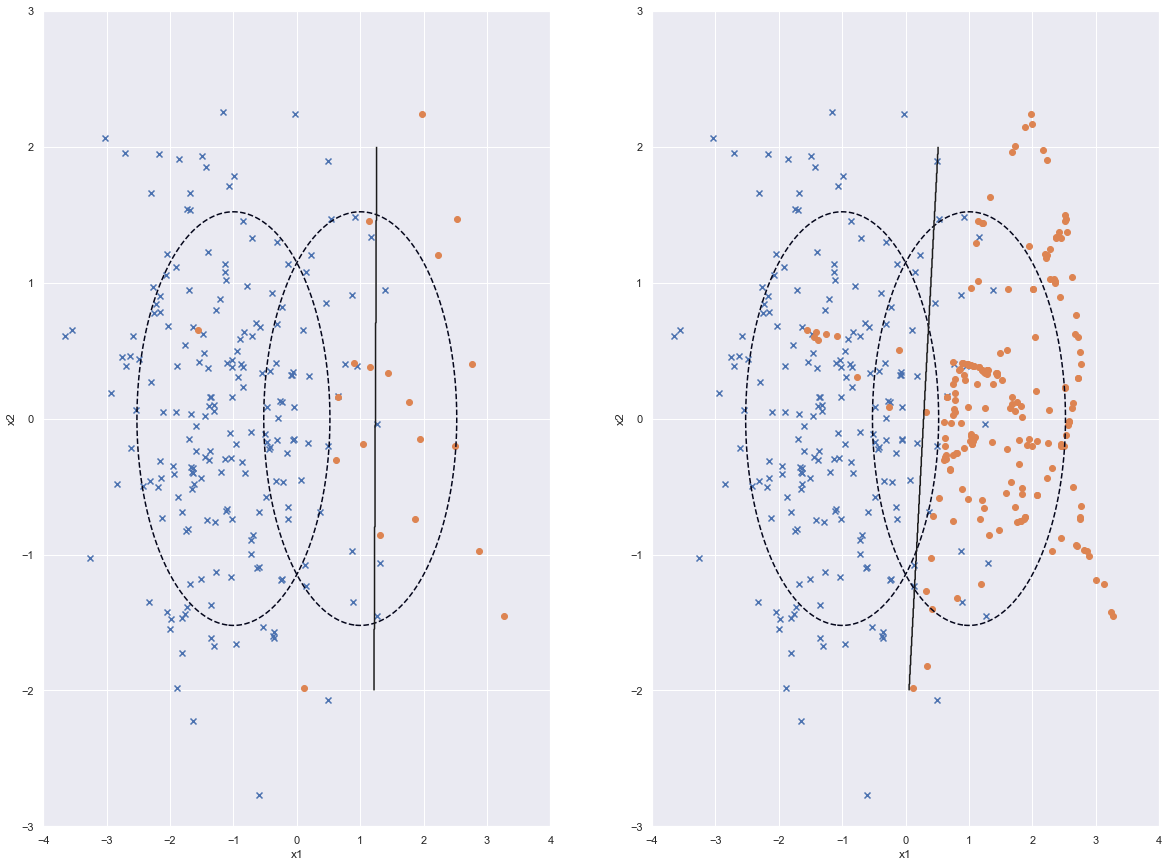

In [77]:
# SMOTE
X_samp, y_samp = SMOTE(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('SMOTE.png')

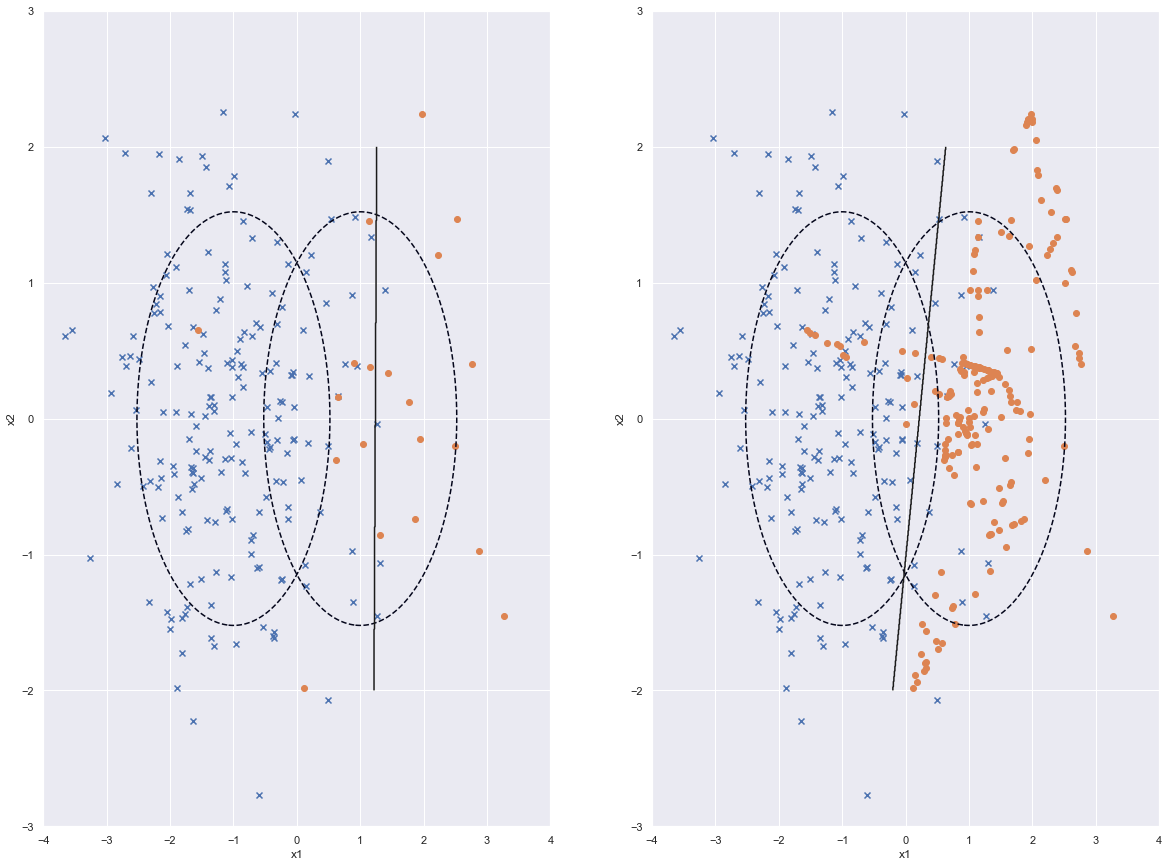

In [78]:
# ADASYN
X_samp, y_samp = ADASYN(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('ADASYN.png')

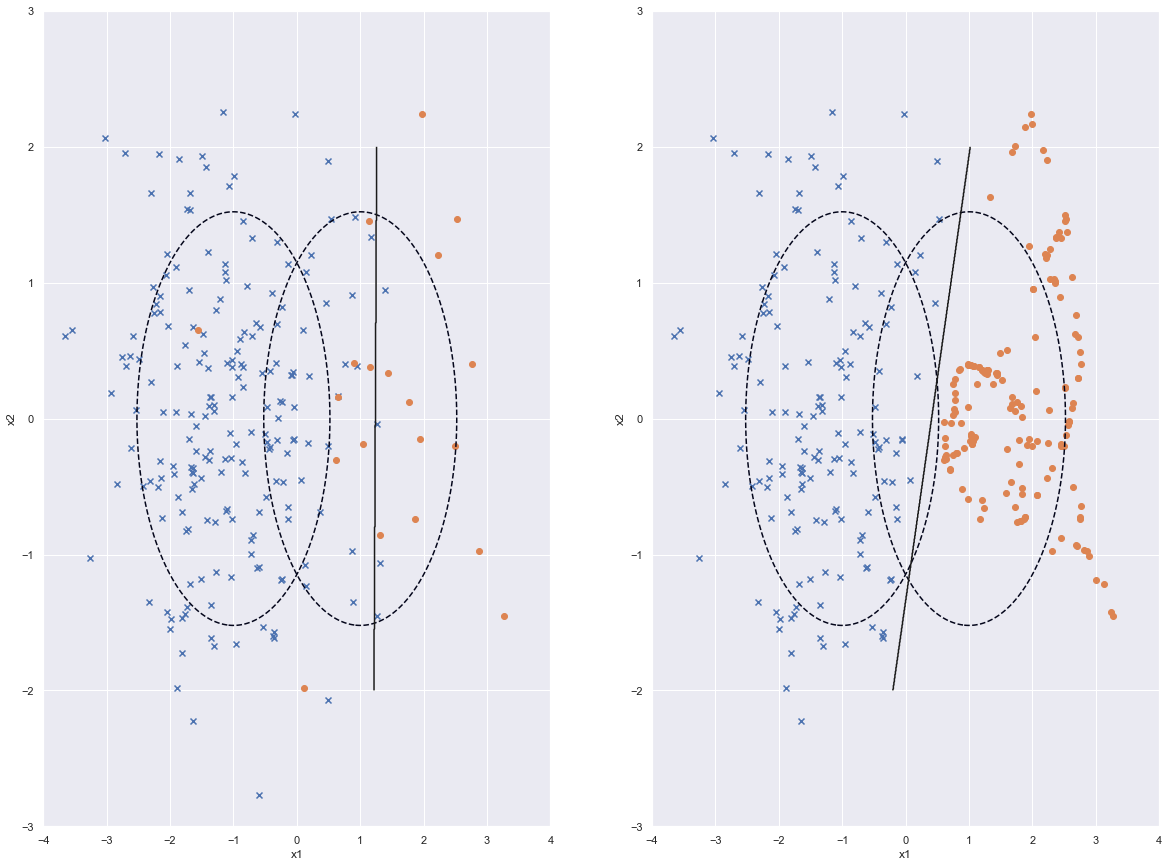

In [79]:
# SMOTE-ENN
X_samp, y_samp = SMOTEENN(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('SMOTE-ENN.png')

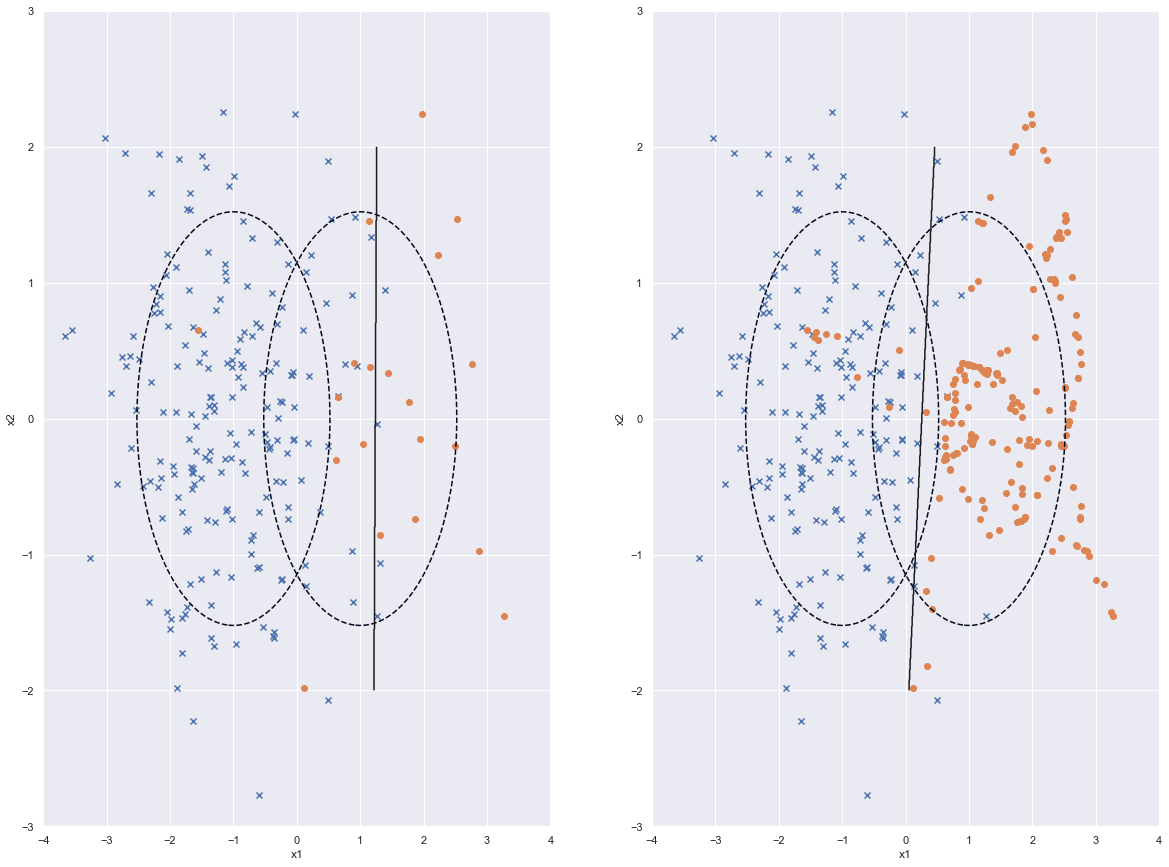

In [80]:
# SMOTE-Tomek
X_samp, y_samp = SMOTETomek(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('SMOTE-Tomek.png')

In [ ]:
### Hyperparameter tuning reference
# KNN : https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning
# GaussianNB : https://www.kaggle.com/code/akshaysharma001/naive-bayes-with-hyperpameter-tuning
# Bagging : https://www.kaggle.com/code/juanmah/tactic-03-hyperparameter-optimization-bagging
# Random Forest : https://www.kaggle.com/code/arjunprasadsarkhel/simple-random-forest-with-hyperparameter-tuning
# AdaBoost : https://www.kaggle.com/code/juanmah/tactic-03-hyperparameter-optimization-adaboost 
# XGBoost : https://www.kaggle.com/code/michalbrezk/xgboost-classifier-and-hyperparameter-tuning-85  
# SVM : https://www.kaggle.com/code/rajeevnair676/svm-hyperparameter-tuning

In [ ]:
### K-Nearest Neighbor (KNN)

In [24]:
## KNN with SMOTE
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [25]:
from sklearn import metrics
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))
    yhat= knn.predict(np.array(sediment_test_x))
    mean_acc[i-1] = metrics.accuracy_score(sediment_encoded_test_y, yhat)

mean_acc

array([0.62984496, 0.65310078, 0.60852713, 0.64341085, 0.61046512,
       0.61627907, 0.6124031 , 0.60852713, 0.60077519, 0.60271318,
       0.58527132, 0.59689922, 0.57751938, 0.59108527, 0.58527132,
       0.60077519, 0.59689922, 0.58914729, 0.56782946, 0.57364341])

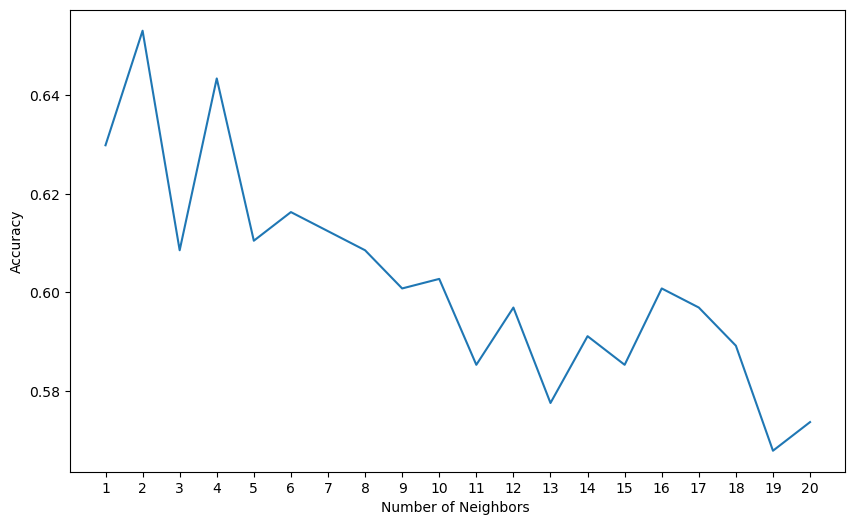

In [26]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : range(1,21),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 2, cv = 5, n_jobs = -1)

In [28]:
# fit the model on our train set
g_res = gs.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [29]:
# find the best score
g_res.best_score_

0.8897239263803682

In [30]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [31]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', algorithm = 'brute', metric = 'manhattan')
knn.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=1)

In [32]:
# get a prediction
y_hat = knn.predict(np.array(sediment_train_x_sm))
y_knn = knn.predict(np.array(sediment_test_x))
print('Training set accuracy: ', metrics.accuracy_score(sediment_encoded_train_y_sm, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(sediment_encoded_test_y, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.6976744186046512


In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_knn))

[[ 14   0   7   3]
 [  3 233  72   3]
 [ 12  47  99   2]
 [  2   3   2  14]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_knn))

              precision    recall  f1-score   support

           0       0.45      0.58      0.51        24
           1       0.82      0.75      0.78       311
           2       0.55      0.62      0.58       160
           3       0.64      0.67      0.65        21

    accuracy                           0.70       516
   macro avg       0.62      0.65      0.63       516
weighted avg       0.71      0.70      0.70       516



In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm), cv=5)
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8897239263803682


In [36]:
## KNN with ADASYN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [37]:
from sklearn import metrics
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads))
    yhat= knn.predict(np.array(sediment_test_x))
    mean_acc[i-1] = metrics.accuracy_score(sediment_encoded_test_y, yhat)

mean_acc

array([0.63178295, 0.64341085, 0.61627907, 0.62209302, 0.59108527,
       0.61046512, 0.58139535, 0.59689922, 0.57364341, 0.58914729,
       0.57945736, 0.59302326, 0.56976744, 0.59302326, 0.57170543,
       0.58139535, 0.55620155, 0.56976744, 0.55813953, 0.5620155 ])

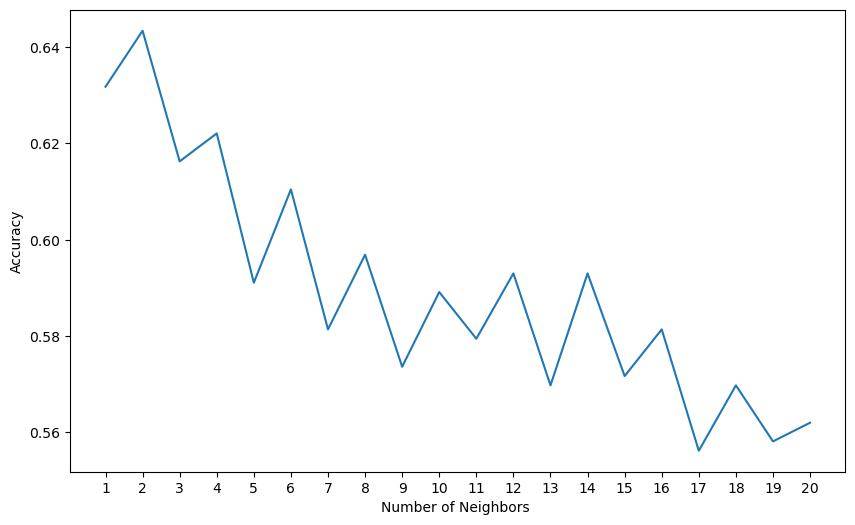

In [38]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : range(1,21),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 2, cv = 5, n_jobs = -1)

In [40]:
# fit the model on our train set
g_res = gs.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [41]:
# find the best score
g_res.best_score_

0.8585858755422754

In [42]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [43]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', algorithm = 'brute', metric = 'manhattan')
knn.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads))

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=1)

In [44]:
# get a prediction
y_hat = knn.predict(np.array(sediment_train_x_ads))
y_knn = knn.predict(np.array(sediment_test_x))
print('Training set accuracy: ', metrics.accuracy_score(sediment_encoded_train_y_ads, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(sediment_encoded_test_y, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.689922480620155


In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_knn))

[[ 14   1   6   3]
 [  2 231  74   4]
 [ 11  48  97   4]
 [  2   3   2  14]]


In [46]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_knn))

              precision    recall  f1-score   support

           0       0.48      0.58      0.53        24
           1       0.82      0.74      0.78       311
           2       0.54      0.61      0.57       160
           3       0.56      0.67      0.61        21

    accuracy                           0.69       516
   macro avg       0.60      0.65      0.62       516
weighted avg       0.71      0.69      0.70       516



In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads), cv=5)
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8585858755422754


In [48]:
## KNN with SMOTE-ENN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [49]:
from sklearn import metrics
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme))
    yhat= knn.predict(np.array(sediment_test_x))
    mean_acc[i-1] = metrics.accuracy_score(sediment_encoded_test_y, yhat)

mean_acc

array([0.59302326, 0.58914729, 0.54457364, 0.55620155, 0.54651163,
       0.54651163, 0.53682171, 0.53682171, 0.5251938 , 0.52713178,
       0.51162791, 0.52131783, 0.50581395, 0.50968992, 0.5       ,
       0.50775194, 0.49612403, 0.5       , 0.49806202, 0.5       ])

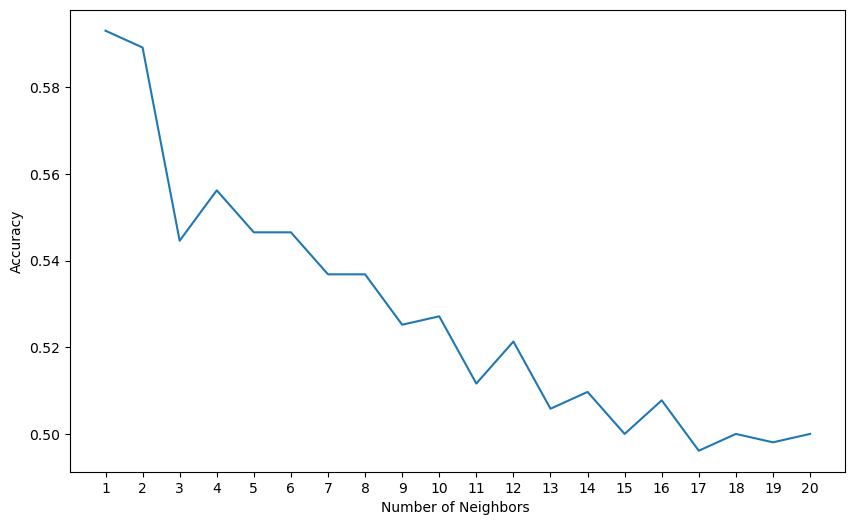

In [50]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : range(1,21),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 2, cv = 5, n_jobs = -1)

In [52]:
# fit the model on our train set
g_res = gs.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [53]:
# find the best score
g_res.best_score_

0.987214316368863

In [54]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}

In [55]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', algorithm = 'brute', metric = 'minkowski')
knn.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme))

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

In [56]:
# get a prediction
y_hat = knn.predict(np.array(sediment_train_x_sme))
y_knn = knn.predict(np.array(sediment_test_x))
print('Training set accuracy: ', metrics.accuracy_score(sediment_encoded_train_y_sme, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(sediment_encoded_test_y, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.5930232558139535


In [57]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_knn))

[[ 10   3   6   5]
 [ 12 195  97   7]
 [ 18  45  88   9]
 [  6   0   2  13]]


In [58]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_knn))

              precision    recall  f1-score   support

           0       0.22      0.42      0.29        24
           1       0.80      0.63      0.70       311
           2       0.46      0.55      0.50       160
           3       0.38      0.62      0.47        21

    accuracy                           0.59       516
   macro avg       0.46      0.55      0.49       516
weighted avg       0.65      0.59      0.61       516



In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme), cv=5)
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.987214316368863


In [60]:
## KNN with SMOTE-Tomek
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [61]:
from sklearn import metrics
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))
    yhat= knn.predict(np.array(sediment_test_x))
    mean_acc[i-1] = metrics.accuracy_score(sediment_encoded_test_y, yhat)

mean_acc

array([0.62984496, 0.65116279, 0.60852713, 0.63953488, 0.61434109,
       0.62015504, 0.61046512, 0.60658915, 0.59689922, 0.59496124,
       0.58333333, 0.5872093 , 0.58139535, 0.58527132, 0.57945736,
       0.58527132, 0.5755814 , 0.57170543, 0.5620155 , 0.56589147])

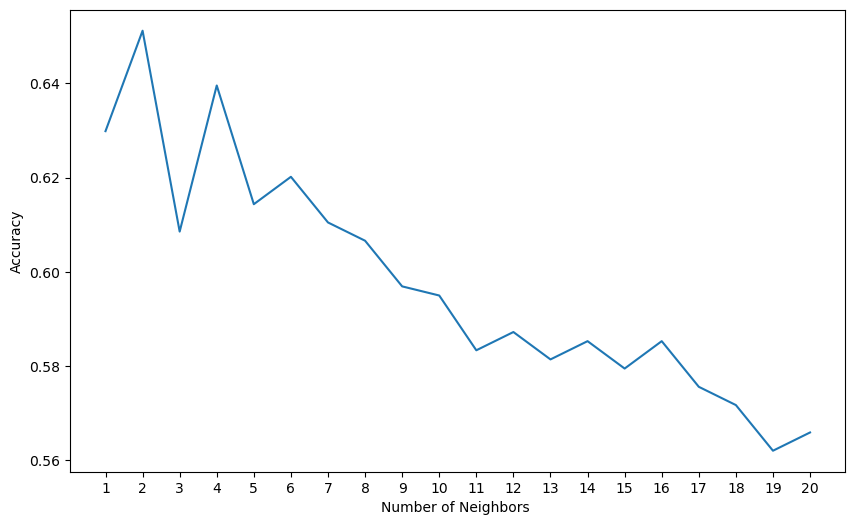

In [62]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [63]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : range(1,21),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 2, cv = 5, n_jobs = -1)

In [64]:
# fit the model on our train set
g_res = gs.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


In [65]:
# find the best score
g_res.best_score_

0.9088188976377953

In [66]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [67]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', algorithm = 'brute', metric = 'manhattan')
knn.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=1)

In [68]:
# get a prediction
y_hat = knn.predict(np.array(sediment_train_x_smt))
y_knn = knn.predict(np.array(sediment_test_x))
print('Training set accuracy: ', metrics.accuracy_score(sediment_encoded_train_y_smt, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(sediment_encoded_test_y, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.689922480620155


In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_knn))

[[ 14   0   7   3]
 [  3 231  74   3]
 [ 12  49  97   2]
 [  2   3   2  14]]


In [70]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_knn))

              precision    recall  f1-score   support

           0       0.45      0.58      0.51        24
           1       0.82      0.74      0.78       311
           2       0.54      0.61      0.57       160
           3       0.64      0.67      0.65        21

    accuracy                           0.69       516
   macro avg       0.61      0.65      0.63       516
weighted avg       0.71      0.69      0.70       516



In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt), cv=5)
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.9088188976377953


In [72]:
### Gaussian Naive Bayes (GaussianNB)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV

In [73]:
## GaussianNB with SMOTE
model = GaussianNB()
model

GaussianNB()

In [74]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=2, 
                     scoring='accuracy')

# Data_transformed = PowerTransformer().fit_transform(np.array(sediment_train_x_sm))

gs_NB.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................v

[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ..................v

[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.02848035868435802; total time=   0.0s
[CV] END ..................var_smoothing=0.02848035868435802; total time=   0.0s
[CV] END ..................var_smoothing=0.02848035868435802; total time=   0.0s
[CV] END ..................var_smoothing=0.02848035868435802; total time=   0.0s
[CV] END ..................var_smoothing=0.02848035868435802; total time=   0.0s
[CV] END ..................var_smoothing=0.02848035868435802; total time=   0.0s
[CV] END ..................v

[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................va

[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ...................

[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0001873817422860383; total time=   0.0s
[CV] END ................var_smoothing=0.0001873817422860383; total time=   0.0s
[CV] END ................var_smoothing=0.0001873817422860383; total time=   0.0s
[CV] END ................var_smoothing=0.0001873817422860383; total time=   0.0s
[CV] END ................var_smoothing=0.0001873817422860383; total time=   0.0s
[CV] END ................var

[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var

[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var

[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151277e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=1.519911082952933e-08; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-09; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-09; total time=   0.0s
[CV] END ................var

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=2)

In [75]:
gs_NB.best_params_

{'var_smoothing': 1e-09}

In [76]:
gs_NB.best_score_

0.7520961145194274

In [77]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
results_NB

,var_smoothing,test_score
0,1.000000e+00,0.263292
1,8.111308e-01,0.264877
2,6.579332e-01,0.267536
3,5.336699e-01,0.270501
4,4.328761e-01,0.274233
...,...,...
95,2.310130e-09,0.743558
96,1.873817e-09,0.745654
97,1.519911e-09,0.747495
98,1.232847e-09,0.749387


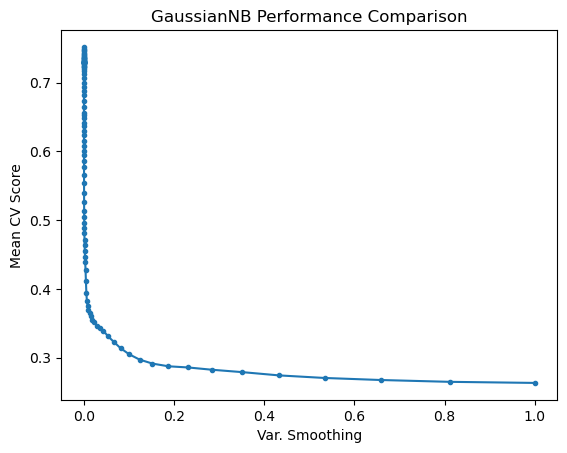

In [78]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("GaussianNB Performance Comparison")
plt.show()

In [79]:
gnb = GaussianNB(var_smoothing = 1e-09)
gnb.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm)) 

GaussianNB()

In [80]:
# predict the target on the test dataset
# Data_transformed_test = PowerTransformer().fit_transform(np.array(sediment_test_x))
y_NB = gnb.predict(np.array(sediment_test_x))

# Accuracy Score on test dataset
accuracy_test = accuracy_score(sediment_encoded_test_y, y_NB)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7306201550387597


In [81]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_NB))

[[ 16   0   3   5]
 [  0 242  66   3]
 [ 10  35 107   8]
 [  4   4   1  12]]


In [82]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_NB))

              precision    recall  f1-score   support

           0       0.53      0.67      0.59        24
           1       0.86      0.78      0.82       311
           2       0.60      0.67      0.64       160
           3       0.43      0.57      0.49        21

    accuracy                           0.73       516
   macro avg       0.61      0.67      0.63       516
weighted avg       0.75      0.73      0.74       516



In [83]:
## GaussianNB with ADASYN
model = GaussianNB()
model

GaussianNB()

In [84]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=2, 
                     scoring='accuracy')

# Data_transformed = PowerTransformer().fit_transform(np.array(sediment_train_x_ads))

gs_NB.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads))

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................v

[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................

[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................v

[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.005336699231206307; total time=   0.0s
[CV] END .................var_smoothing=0.005336699231206307; total time=   0.0s
[CV] END .................var_smoothing=0.005336699231206307; total time=   0.0s
[CV] END .................var_smoothing=0.005336699231206307; total time=   0.0s
[CV] END .................var_smoothing=0.005336699231206307; total time=   0.0s
[CV] END .................var_smoothing=0.005336699231206307; total time=   0.0s
[CV] END .................var_smoothing=0.005336699231206307; total time=   0.0s
[CV] END .................va

[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=0.0003511191734215131; total time=   0.0s
[CV] END ................var_smoothing=0.0003511191734215131; total time=   0.0s
[CV] END ................var_smoothing=0.0003511191734215131; total time=   0.0s
[CV] END ................var_smoothing=0.0003511191734215131; total time=   0.0s
[CV] END ................var_smoothing=0.0003511191734215131; total time=   0.0s
[CV] END ................var_smoothing=0.0003511191734215131; total time=   0.0s
[CV] END ................var_smoothing=0.0003511191734215131; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896872e-05; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ................var

[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...................

[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=5.336699231206313e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_

[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575682e-08; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ...................

[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-09; total time=   0.0s
[CV] END ................var

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=2)

In [85]:
gs_NB.best_params_

{'var_smoothing': 1e-09}

In [86]:
gs_NB.best_score_

0.742512624112795

In [87]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
results_NB

,var_smoothing,test_score
0,1.000000e+00,0.264819
1,8.111308e-01,0.264767
2,6.579332e-01,0.264767
3,5.336699e-01,0.264612
4,4.328761e-01,0.265283
...,...,...
95,2.310130e-09,0.731154
96,1.873817e-09,0.733735
97,1.519911e-09,0.736575
98,1.232847e-09,0.739983


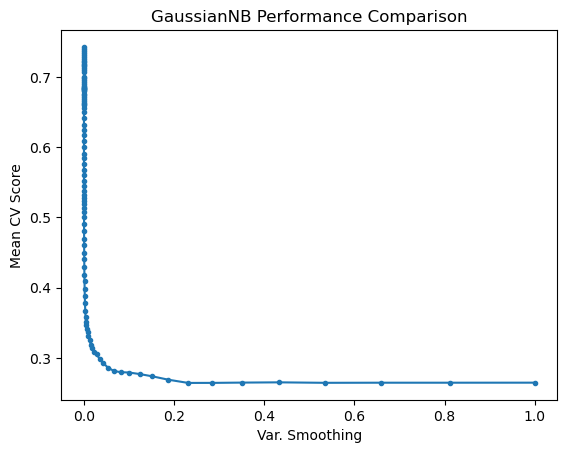

In [88]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("GaussianNB Performance Comparison")
plt.show()

In [89]:
gnb = GaussianNB(var_smoothing = 1e-09)
gnb.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads))

GaussianNB()

In [90]:
# predict the target on the test dataset
# Data_transformed_test = PowerTransformer().fit_transform(np.array(sediment_test_x))
y_NB = gnb.predict(np.array(sediment_test_x))

# Accuracy Score on test dataset
accuracy_test = accuracy_score(sediment_encoded_test_y, y_NB)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7693798449612403


In [91]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_NB))

[[ 18   0   3   3]
 [  1 259  47   4]
 [ 12  32 109   7]
 [  5   3   2  11]]


In [92]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_NB))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60        24
           1       0.88      0.83      0.86       311
           2       0.68      0.68      0.68       160
           3       0.44      0.52      0.48        21

    accuracy                           0.77       516
   macro avg       0.62      0.70      0.65       516
weighted avg       0.78      0.77      0.77       516



In [93]:
## Gaussian NB with SMOTE-ENN
model = GaussianNB()
model

GaussianNB()

In [94]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=2, 
                     scoring='accuracy')

# Data_transformed = PowerTransformer().fit_transform(np.array(sediment_train_x_sme))

gs_NB.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme))

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................v

[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................

[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.02848035868435802; total time=   0.0s
[CV] END ..................var_smoothing=0.02848035868435802; total time=   0.0s
[CV] END ..................v

[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................va

[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ...................

[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var_smoothing=0.0002310129700083158; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=3.511191734215127e-05; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435799e-07; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ................var_smoothing=5.336699231206302e-08; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-08; total time=   0.0s
[CV] END ...............var_

[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860387e-09; total time=   0.0s
[CV] END ................var

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=2)

In [95]:
gs_NB.best_params_

{'var_smoothing': 8.111308307896873e-08}

In [96]:
gs_NB.best_score_

0.7792460185002267

In [97]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
results_NB

,var_smoothing,test_score
0,1.000000e+00,0.427940
1,8.111308e-01,0.424031
2,6.579332e-01,0.421260
3,5.336699e-01,0.416217
4,4.328761e-01,0.410038
...,...,...
95,2.310130e-09,0.772853
96,1.873817e-09,0.774842
97,1.519911e-09,0.775623
98,1.232847e-09,0.775978


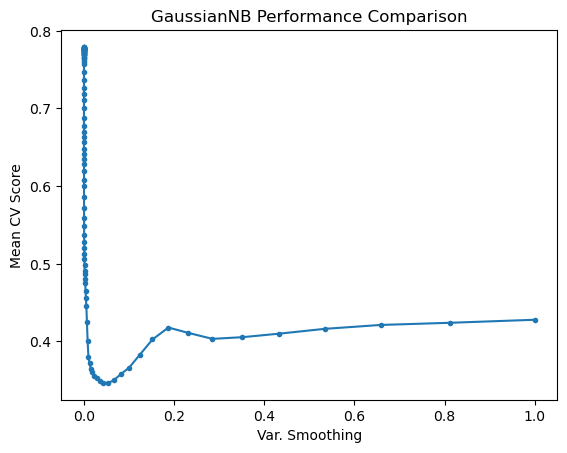

In [98]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("GaussianNB Performance Comparison")
plt.show()

In [99]:
gnb = GaussianNB(var_smoothing = 8.111308307896873e-08)
gnb.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme))

GaussianNB(var_smoothing=8.111308307896873e-08)

In [100]:
# predict the target on the test dataset
# Data_transformed_test = PowerTransformer().fit_transform(np.array(sediment_test_x))
y_NB = gnb.predict(np.array(sediment_test_x))

# Accuracy Score on test dataset
accuracy_test = accuracy_score(sediment_encoded_test_y, y_NB)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.6608527131782945


In [101]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_NB))

[[ 16   0   5   3]
 [  4 199 100   8]
 [ 20  25 108   7]
 [  2   1   0  18]]


In [102]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_NB))

              precision    recall  f1-score   support

           0       0.38      0.67      0.48        24
           1       0.88      0.64      0.74       311
           2       0.51      0.68      0.58       160
           3       0.50      0.86      0.63        21

    accuracy                           0.66       516
   macro avg       0.57      0.71      0.61       516
weighted avg       0.73      0.66      0.68       516



In [103]:
## GaussianNB with SMOTE-Tomek
model = GaussianNB()
model

GaussianNB()

In [104]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=2, 
                     scoring='accuracy')

# Data_transformed = PowerTransformer().fit_transform(np.array(sediment_train_x_smt))

gs_NB.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................v

[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ..................var_smoothing=0.23101297000831597; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................var_smoothing=0.1873817422860384; total time=   0.0s
[CV] END ...................

[CV] END ..................var_smoothing=0.04328761281083057; total time=   0.0s
[CV] END ..................var_smoothing=0.04328761281083057; total time=   0.0s
[CV] END ..................var_smoothing=0.04328761281083057; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................var_smoothing=0.03511191734215131; total time=   0.0s
[CV] END ..................v

[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.008111308307896872; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................var_smoothing=0.006579332246575682; total time=   0.0s
[CV] END .................va

[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0015199110829529332; total time=   0.0s
[CV] END ................var_smoothing=0.0012328467394420659; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=0.0003511191734215131; total time=   0.0s
[CV] END ................var_smoothing=0.0003511191734215131; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var_smoothing=0.0002848035868435802; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_smoothing=5.3366992312063123e-05; total time=   0.0s
[CV] END ...............var_

[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ...................

[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=2.310129700083158e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var

[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_smoothing=4.3287612810830526e-07; total time=   0.0s
[CV] END ...............var_

[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-08; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=1.873817422860383e-08; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-08; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-08; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-08; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-08; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-08; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-08; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-08; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-08; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-08; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-08; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-08; total time=   0.0s
[CV] END ................var

[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ...............var_smoothing=3.5111917342151273e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var_smoothing=2.848035868435805e-09; total time=   0.0s
[CV] END ................var

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=2)

In [105]:
gs_NB.best_params_

{'var_smoothing': 1e-09}

In [106]:
gs_NB.best_score_

0.7516535433070868

In [107]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
results_NB

,var_smoothing,test_score
0,1.000000e+00,0.261627
1,8.111308e-01,0.262835
2,6.579332e-01,0.265774
3,5.336699e-01,0.268924
4,4.328761e-01,0.272073
...,...,...
95,2.310130e-09,0.743150
96,1.873817e-09,0.745827
97,1.519911e-09,0.747034
98,1.232847e-09,0.748976


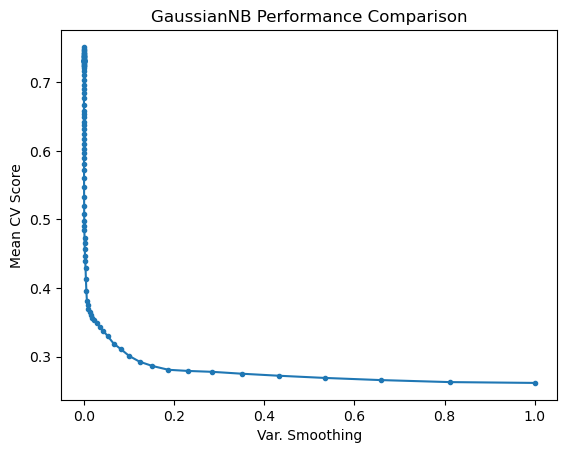

In [108]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("GaussianNB Performance Comparison")
plt.show()

In [109]:
gnb = GaussianNB(var_smoothing = 1e-09)
gnb.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

GaussianNB()

In [110]:
# predict the target on the test dataset
# Data_transformed_test = PowerTransformer().fit_transform(np.array(sediment_test_x))
y_NB = gnb.predict(np.array(sediment_test_x))

# Accuracy Score on test dataset
accuracy_test = accuracy_score(sediment_encoded_test_y, y_NB)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7306201550387597


In [111]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_NB))

[[ 16   0   3   5]
 [  0 240  68   3]
 [  9  35 108   8]
 [  4   4   0  13]]


In [112]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_NB))

              precision    recall  f1-score   support

           0       0.55      0.67      0.60        24
           1       0.86      0.77      0.81       311
           2       0.60      0.68      0.64       160
           3       0.45      0.62      0.52        21

    accuracy                           0.73       516
   macro avg       0.62      0.68      0.64       516
weighted avg       0.75      0.73      0.74       516



In [24]:
### Bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# from lwoku import RANDOM_STATE, N_JOBS, VERBOSE, get_prediction
# from grid_search_utils import plot_grid_search, table_grid_search

import pickle

In [27]:
## Bagging with SMOTE
bg_clf = BaggingClassifier()
bg_clf

BaggingClassifier()

In [28]:
parameters = {
    'n_estimators': [200, 500],
    'max_features': [0.90, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
clf = GridSearchCV(bg_clf, parameters, cv = 3, verbose = 2, n_jobs = -1)
clf.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))
# plot_grid_search(clf)
# table_grid_search(clf)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.9, 1.0],
                         'n_estimators': [200, 500]},
             verbose=2)

In [29]:
with open('clf.pickle', 'wb') as fp:
    pickle.dump(clf, fp)

In [30]:
clf.best_estimator_

BaggingClassifier(max_features=0.9, n_estimators=200)

In [31]:
print ('Random grid: ', parameters, '\n')
# print the best parameters
print ('Best Parameters: ', clf.best_params_, ' \n')

Random grid:  {'n_estimators': [200, 500], 'max_features': [0.9, 1.0], 'bootstrap': [True, False], 'bootstrap_features': [True, False]} 

Best Parameters:  {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.9, 'n_estimators': 200}  



In [32]:
randmb = BaggingClassifier(n_estimators = 200, max_features = 0.9, bootstrap = True, bootstrap_features = False) 
randmb.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm)) 

BaggingClassifier(max_features=0.9, n_estimators=200)

In [33]:
y_bag = randmb.predict(np.array(sediment_test_x))

In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_bag))

[[ 17   0   5   2]
 [  0 290  20   1]
 [  3   8 145   4]
 [  0   0   1  20]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_bag))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.97      0.93      0.95       311
           2       0.85      0.91      0.88       160
           3       0.74      0.95      0.83        21

    accuracy                           0.91       516
   macro avg       0.85      0.87      0.86       516
weighted avg       0.92      0.91      0.92       516



In [25]:
## Bagging with ADASYN
bg_clf = BaggingClassifier()
bg_clf

BaggingClassifier()

In [26]:
parameters = {
    'n_estimators': [200, 500],
    'max_features': [0.90, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
clf = GridSearchCV(bg_clf, parameters, cv = 3, verbose = 2, n_jobs = -1)
clf.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads))
# plot_grid_search(clf)
# table_grid_search(clf)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.9, 1.0],
                         'n_estimators': [200, 500]},
             verbose=2)

In [27]:
with open('clf.pickle', 'wb') as fp:
    pickle.dump(clf, fp)

In [28]:
clf.best_estimator_

BaggingClassifier(bootstrap_features=True, n_estimators=500)

In [29]:
print ('Random grid: ', parameters, '\n')
# print the best parameters
print ('Best Parameters: ', clf.best_params_, ' \n')

Random grid:  {'n_estimators': [200, 500], 'max_features': [0.9, 1.0], 'bootstrap': [True, False], 'bootstrap_features': [True, False]} 

Best Parameters:  {'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'n_estimators': 500}  



In [30]:
randmb = BaggingClassifier(n_estimators = 500, max_features = 1.0, bootstrap = True, bootstrap_features = True) 
randmb.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads)) 

BaggingClassifier(bootstrap_features=True, n_estimators=500)

In [31]:
y_bag = randmb.predict(np.array(sediment_test_x))

In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_bag))

[[ 17   0   4   3]
 [  0 288  22   1]
 [  2  15 140   3]
 [  0   0   0  21]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_bag))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        24
           1       0.95      0.93      0.94       311
           2       0.84      0.88      0.86       160
           3       0.75      1.00      0.86        21

    accuracy                           0.90       516
   macro avg       0.86      0.88      0.86       516
weighted avg       0.91      0.90      0.90       516



In [34]:
## Bagging with SMOTE-ENN
bg_clf = BaggingClassifier()
bg_clf

BaggingClassifier()

In [35]:
parameters = {
    'n_estimators': [200, 500],
    'max_features': [0.90, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
clf = GridSearchCV(bg_clf, parameters, cv = 3, verbose = 2, n_jobs = -1)
clf.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme))
# plot_grid_search(clf)
# table_grid_search(clf)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.9, 1.0],
                         'n_estimators': [200, 500]},
             verbose=2)

In [36]:
with open('clf.pickle', 'wb') as fp:
    pickle.dump(clf, fp)

In [37]:
clf.best_estimator_

BaggingClassifier(bootstrap=False, bootstrap_features=True, max_features=0.9,
                  n_estimators=200)

In [38]:
print ('Random grid: ', parameters, '\n')
# print the best parameters
print ('Best Parameters: ', clf.best_params_, ' \n')

Random grid:  {'n_estimators': [200, 500], 'max_features': [0.9, 1.0], 'bootstrap': [True, False], 'bootstrap_features': [True, False]} 

Best Parameters:  {'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.9, 'n_estimators': 200}  



In [39]:
randmb = BaggingClassifier(n_estimators = 200, max_features = 0.9, bootstrap = False, bootstrap_features = True) 
randmb.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme)) 

BaggingClassifier(bootstrap=False, bootstrap_features=True, max_features=0.9,
                  n_estimators=200)

In [40]:
y_bag = randmb.predict(np.array(sediment_test_x))

In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_bag))

[[ 18   0   5   1]
 [  0 256  49   6]
 [  6  21 128   5]
 [  0   1   0  20]]


In [42]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_bag))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        24
           1       0.92      0.82      0.87       311
           2       0.70      0.80      0.75       160
           3       0.62      0.95      0.75        21

    accuracy                           0.82       516
   macro avg       0.75      0.83      0.78       516
weighted avg       0.83      0.82      0.82       516



In [43]:
##Bagging with SMOTE-Tomek
bg_clf = BaggingClassifier()
bg_clf

BaggingClassifier()

In [44]:
parameters = {
    'n_estimators': [200, 500],
    'max_features': [0.90, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}
clf = GridSearchCV(bg_clf, parameters, cv = 3, verbose = 2, n_jobs = -1)
clf.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))
# plot_grid_search(clf)
# table_grid_search(clf)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.9, 1.0],
                         'n_estimators': [200, 500]},
             verbose=2)

In [45]:
with open('clf.pickle', 'wb') as fp:
    pickle.dump(clf, fp)

In [46]:
clf.best_estimator_

BaggingClassifier(max_features=0.9, n_estimators=200)

In [47]:
print ('Random grid: ', parameters, '\n')
# print the best parameters
print ('Best Parameters: ', clf.best_params_, ' \n')

Random grid:  {'n_estimators': [200, 500], 'max_features': [0.9, 1.0], 'bootstrap': [True, False], 'bootstrap_features': [True, False]} 

Best Parameters:  {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.9, 'n_estimators': 200}  



In [48]:
randmb = BaggingClassifier(n_estimators = 200, max_features = 0.9, bootstrap = True, bootstrap_features = False) 
randmb.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt)) 

BaggingClassifier(max_features=0.9, n_estimators=200)

In [49]:
y_bag = randmb.predict(np.array(sediment_test_x))

In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_bag))

[[ 18   0   5   1]
 [  0 290  20   1]
 [  3  13 140   4]
 [  0   0   0  21]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_bag))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.96      0.93      0.94       311
           2       0.85      0.88      0.86       160
           3       0.78      1.00      0.88        21

    accuracy                           0.91       516
   macro avg       0.86      0.89      0.87       516
weighted avg       0.91      0.91      0.91       516



In [52]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier

In [53]:
## Random Forest with SMOTE
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [54]:
n_estimators = [200,500] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 10] # minimum sample number to split a node
min_samples_leaf = [1, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [55]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)

In [56]:
rf_random.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\util

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 32, 55, 77, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [200, 500]},
                   random_state=35, verbose=2)

In [57]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 32, 55, 77, 100], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 77, 'bootstrap': False}  



In [58]:
randmf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, 
                                max_features = 'sqrt', max_depth = 77, bootstrap = False) 
randmf.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm)) 

RandomForestClassifier(bootstrap=False, max_depth=77, n_estimators=200)

In [59]:
y_rf = randmf.predict(np.array(sediment_test_x))

In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_rf))

[[ 18   0   5   1]
 [  0 294  16   1]
 [  0  20 139   1]
 [  0   1   0  20]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_rf))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        24
           1       0.93      0.95      0.94       311
           2       0.87      0.87      0.87       160
           3       0.87      0.95      0.91        21

    accuracy                           0.91       516
   macro avg       0.92      0.88      0.89       516
weighted avg       0.91      0.91      0.91       516



In [62]:
## Random Forest with ADASYN
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [63]:
n_estimators = [200,500] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 10] # minimum sample number to split a node
min_samples_leaf = [1, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [64]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)

In [65]:
rf_random.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
156 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\util

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 32, 55, 77, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [200, 500]},
                   random_state=35, verbose=2)

In [66]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 32, 55, 77, 100], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}  



In [67]:
randmf = RandomForestClassifier(n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1, 
                                max_features = 'sqrt', max_depth = 100, bootstrap = False) 
randmf.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads)) 

RandomForestClassifier(bootstrap=False, max_depth=100, n_estimators=500)

In [68]:
y_rf = randmf.predict(np.array(sediment_test_x))

In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_rf))

[[ 16   0   7   1]
 [  0 294  16   1]
 [  2  17 139   2]
 [  0   2   0  19]]


In [70]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_rf))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        24
           1       0.94      0.95      0.94       311
           2       0.86      0.87      0.86       160
           3       0.83      0.90      0.86        21

    accuracy                           0.91       516
   macro avg       0.88      0.85      0.86       516
weighted avg       0.91      0.91      0.91       516



In [71]:
## Random Forest with SMOTE-ENN
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [72]:
n_estimators = [200,500] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 10] # minimum sample number to split a node
min_samples_leaf = [1, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [73]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)

In [74]:
rf_random.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\utils

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 32, 55, 77, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [200, 500]},
                   random_state=35, verbose=2)

In [75]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 32, 55, 77, 100], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 77, 'bootstrap': False}  



In [76]:
randmf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, 
                                max_features = 'sqrt', max_depth = 77, bootstrap = False) 
randmf.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme)) 

RandomForestClassifier(bootstrap=False, max_depth=77, n_estimators=200)

In [77]:
y_rf = randmf.predict(np.array(sediment_test_x))

In [78]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_rf))

[[ 17   0   6   1]
 [  0 258  47   6]
 [  4  27 125   4]
 [  0   1   0  20]]


In [79]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_rf))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.90      0.83      0.86       311
           2       0.70      0.78      0.74       160
           3       0.65      0.95      0.77        21

    accuracy                           0.81       516
   macro avg       0.76      0.82      0.78       516
weighted avg       0.83      0.81      0.82       516



In [80]:
## Random Forest with SMOTE-Tomek
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [81]:
n_estimators = [200,500] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 10] # minimum sample number to split a node
min_samples_leaf = [1, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [82]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)

In [83]:
rf_random.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
156 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
101 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Hi\anaconda3\Lib\site-packages\sklearn\util

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 32, 55, 77, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [200, 500]},
                   random_state=35, verbose=2)

In [84]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 32, 55, 77, 100], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}  



In [85]:
randmf = RandomForestClassifier(n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1, 
                                max_features = 'sqrt', max_depth = 100, bootstrap = False) 
randmf.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt)) 

RandomForestClassifier(bootstrap=False, max_depth=100, n_estimators=500)

In [86]:
y_rf = randmf.predict(np.array(sediment_test_x))

In [87]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_rf))

[[ 16   0   7   1]
 [  0 294  16   1]
 [  2  20 135   3]
 [  0   1   0  20]]


In [88]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_rf))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        24
           1       0.93      0.95      0.94       311
           2       0.85      0.84      0.85       160
           3       0.80      0.95      0.87        21

    accuracy                           0.90       516
   macro avg       0.87      0.85      0.85       516
weighted avg       0.90      0.90      0.90       516



In [89]:
### AdaBoost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import pickle

In [90]:
## AdaBoost with SMOTE
ab_clf = AdaBoostClassifier()
ab_clf

AdaBoostClassifier()

In [91]:
parameters = {
    'n_estimators': [2, 4, 6, 8, 10, 12],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
clf = GridSearchCV(ab_clf, parameters, cv=3, verbose=2, n_jobs=-1)
clf.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [2, 4, 6, 8, 10, 12]},
             verbose=2)

In [92]:
with open('clf.pickle', 'wb') as fp:
    pickle.dump(clf, fp)

In [93]:
clf.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.03, n_estimators=12)

In [94]:
clf.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.03, 'n_estimators': 12}

In [95]:
randab = AdaBoostClassifier(n_estimators = 12, learning_rate = 1.03, algorithm = 'SAMME')
randab.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.03, n_estimators=12)

In [96]:
y_ab = randab.predict(np.array(sediment_test_x))

In [97]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_ab))

[[ 21   0   3   0]
 [  1 128 182   0]
 [ 46  22  91   1]
 [  6   6   1   8]]


In [98]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_ab))

              precision    recall  f1-score   support

           0       0.28      0.88      0.43        24
           1       0.82      0.41      0.55       311
           2       0.33      0.57      0.42       160
           3       0.89      0.38      0.53        21

    accuracy                           0.48       516
   macro avg       0.58      0.56      0.48       516
weighted avg       0.65      0.48      0.50       516



In [99]:
## AdaBoost with ADASYN
ab_clf = AdaBoostClassifier()
ab_clf

AdaBoostClassifier()

In [100]:
parameters = {
    'n_estimators': [2, 4, 6, 8, 10, 12],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
clf = GridSearchCV(ab_clf, parameters, cv=3, verbose=2, n_jobs=-1)
clf.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads))

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [2, 4, 6, 8, 10, 12]},
             verbose=2)

In [101]:
with open('clf.pickle', 'wb') as fp:
    pickle.dump(clf, fp)

In [102]:
clf.best_estimator_

AdaBoostClassifier(algorithm='SAMME', n_estimators=12)

In [103]:
clf.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 12}

In [104]:
randab = AdaBoostClassifier(n_estimators = 12, learning_rate = 1.0, algorithm = 'SAMME')
randab.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads))

AdaBoostClassifier(algorithm='SAMME', n_estimators=12)

In [105]:
y_ab = randab.predict(np.array(sediment_test_x))

In [106]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_ab))

[[ 20   1   2   1]
 [  8  69 234   0]
 [ 25  22 104   9]
 [  4   4   1  12]]


In [107]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_ab))

              precision    recall  f1-score   support

           0       0.35      0.83      0.49        24
           1       0.72      0.22      0.34       311
           2       0.30      0.65      0.42       160
           3       0.55      0.57      0.56        21

    accuracy                           0.40       516
   macro avg       0.48      0.57      0.45       516
weighted avg       0.57      0.40      0.38       516



In [108]:
## AdaBoost with SMOTE-ENN
ab_clf = AdaBoostClassifier()
ab_clf

AdaBoostClassifier()

In [109]:
parameters = {
    'n_estimators': [2, 4, 6, 8, 10, 12],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
clf = GridSearchCV(ab_clf, parameters, cv=3, verbose=2, n_jobs=-1)
clf.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme))

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [2, 4, 6, 8, 10, 12]},
             verbose=2)

In [110]:
with open('clf.pickle', 'wb') as fp:
    pickle.dump(clf, fp)

In [111]:
clf.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.04, n_estimators=12)

In [112]:
clf.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.04, 'n_estimators': 12}

In [113]:
randab = AdaBoostClassifier(n_estimators = 12, learning_rate = 1.04, algorithm = 'SAMME')
randab.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme))

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.04, n_estimators=12)

In [114]:
y_ab = randab.predict(np.array(sediment_test_x))

In [115]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_ab))

[[ 17   0   6   1]
 [  0  11 296   4]
 [ 12   3 137   8]
 [  1   4   4  12]]


In [116]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_ab))

              precision    recall  f1-score   support

           0       0.57      0.71      0.63        24
           1       0.61      0.04      0.07       311
           2       0.31      0.86      0.45       160
           3       0.48      0.57      0.52        21

    accuracy                           0.34       516
   macro avg       0.49      0.54      0.42       516
weighted avg       0.51      0.34      0.23       516



In [117]:
## AdaBoost with SMOTE-Tomek
ab_clf = AdaBoostClassifier()
ab_clf

AdaBoostClassifier()

In [118]:
parameters = {
    'n_estimators': [2, 4, 6, 8, 10, 12],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
clf = GridSearchCV(ab_clf, parameters, cv=3, verbose=2, n_jobs=-1)
clf.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [2, 4, 6, 8, 10, 12]},
             verbose=2)

In [119]:
with open('clf.pickle', 'wb') as fp:
    pickle.dump(clf, fp)

In [120]:
clf.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.01, n_estimators=12)

In [121]:
clf.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1.01, 'n_estimators': 12}

In [122]:
randab = AdaBoostClassifier(n_estimators = 12, learning_rate = 1.01, algorithm = 'SAMME')
randab.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.01, n_estimators=12)

In [123]:
y_ab = randab.predict(np.array(sediment_test_x))

In [124]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_ab))

[[ 17   2   5   0]
 [  0 243  67   1]
 [ 30  37  91   2]
 [  4   7   0  10]]


In [125]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_ab))

              precision    recall  f1-score   support

           0       0.33      0.71      0.45        24
           1       0.84      0.78      0.81       311
           2       0.56      0.57      0.56       160
           3       0.77      0.48      0.59        21

    accuracy                           0.70       516
   macro avg       0.63      0.63      0.60       516
weighted avg       0.73      0.70      0.71       516



In [28]:
!pip install xgboost

In [132]:
### Extreme Gradient Boosting (XGBoost)
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import pickle

In [133]:
## XGBoost with SMOTE
model = XGBClassifier()
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [134]:
params = {
    'n_estimators': [200, 500],
    'learning_rate': [0.01,0.05],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0.5, 1],
    'reg_alpha': [0.5, 1],
    'reg_lambda': [0.5, 5],
    'base_score': [0.2, 1]
}

gs_XGB = GridSearchCV(model, params, cv = 3, verbose = 2, n_jobs = -1)
gs_XGB.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.2, 1],
                         'booster': ['gbtree', 'gblinear'], 'gamma': [0.5, 1],
                         'learning_rate': [0.01, 0.05],
                         'n_estimators': [200, 500], 'reg_alpha': [0.5, 1],
                         'reg_lambda': [0.5, 5]},
             verbose=2)

In [135]:
print('Best score:', gs_XGB.best_score_)
print('Best params:', gs_XGB.best_params_)

Best score: 0.9205436292442458
Best params: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0.5, 'learning_rate': 0.05, 'n_estimators': 500, 'reg_alpha': 0.5, 'reg_lambda': 5}


In [136]:
with open('gs_XGB.pickle', 'wb') as fp:
    pickle.dump(gs_XGB, fp)

In [137]:
gs_XGB.best_estimator_

XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [138]:
gs_XGB.best_params_

{'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0.5,
 'learning_rate': 0.05,
 'n_estimators': 500,
 'reg_alpha': 0.5,
 'reg_lambda': 5}

In [139]:
randxgb = XGBClassifier(base_score = 0.2, booster = 'gbtree', gamma = 0.5,
                       learning_rate = 0.05, n_estimators = 500, reg_alpha = 0.5, reg_lambda = 5)
randxgb.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))

XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [140]:
y_XGB = randxgb.predict(np.array(sediment_test_x))

In [141]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_XGB))

[[ 18   0   3   3]
 [  0 288  23   0]
 [  5  13 141   1]
 [  0   1   0  20]]


In [142]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_XGB))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.95      0.93      0.94       311
           2       0.84      0.88      0.86       160
           3       0.83      0.95      0.89        21

    accuracy                           0.91       516
   macro avg       0.85      0.88      0.86       516
weighted avg       0.91      0.91      0.91       516



In [143]:
## XGBoost with ADASYN
model = XGBClassifier()
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [144]:
params = {
    'n_estimators': [200, 500],
    'learning_rate': [0.01,0.05],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0.5, 1],
    'reg_alpha': [0.5, 1],
    'reg_lambda': [0.5, 5],
    'base_score': [0.2, 1]
}

gs_XGB = GridSearchCV(model, params, cv = 3, verbose = 2, n_jobs = -1)
gs_XGB.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads))

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.2, 1],
                         'booster': ['gbtree', 'gblinear'], 'gamma': [0.5, 1],
                         'learning_rate': [0.01, 0.05],
                         'n_estimators': [200, 500], 'reg_alpha': [0.5, 1],
                         'reg_lambda': [0.5, 5]},
             verbose=2)

In [145]:
print('Best score:', gs_XGB.best_score_)
print('Best params:', gs_XGB.best_params_)

Best score: 0.9089219330855017
Best params: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0.5, 'learning_rate': 0.05, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 0.5}


In [146]:
with open('gs_XGB.pickle', 'wb') as fp:
    pickle.dump(gs_XGB, fp)

In [147]:
gs_XGB.best_estimator_

XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [148]:
gs_XGB.best_params_

{'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0.5,
 'learning_rate': 0.05,
 'n_estimators': 500,
 'reg_alpha': 1,
 'reg_lambda': 0.5}

In [149]:
randxgb = XGBClassifier(base_score = 0.2, booster = 'gbtree', gamma = 0.5,
                       learning_rate = 0.05, n_estimators = 500, reg_alpha = 1, reg_lambda = 0.5)
randxgb.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads))

XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [150]:
y_XGB = randxgb.predict(np.array(sediment_test_x))

In [151]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_XGB))

[[ 19   0   2   3]
 [  0 291  20   0]
 [  4  12 142   2]
 [  0   0   0  21]]


In [152]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_XGB))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.96      0.94      0.95       311
           2       0.87      0.89      0.88       160
           3       0.81      1.00      0.89        21

    accuracy                           0.92       516
   macro avg       0.87      0.90      0.88       516
weighted avg       0.92      0.92      0.92       516



In [154]:
## XGBoost with SMOTE-ENN
model = XGBClassifier()
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [155]:
params = {
    'n_estimators': [200, 500],
    'learning_rate': [0.01,0.05],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0.5, 1],
    'reg_alpha': [0.5, 1],
    'reg_lambda': [0.5, 5],
    'base_score': [0.2, 1]
}

gs_XGB = GridSearchCV(model, params, cv = 3, verbose = 2, n_jobs = -1)
gs_XGB.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme))

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.2, 1],
                         'booster': ['gbtree', 'gblinear'], 'gamma': [0.5, 1],
                         'learning_rate': [0.01, 0.05],
                         'n_estimators': [200, 500], 'reg_alpha': [0.5, 1],
                         'reg_lambda': [0.5, 5]},
             verbose=2)

In [156]:
print('Best score:', gs_XGB.best_score_)
print('Best params:', gs_XGB.best_params_)

Best score: 0.9595098992507128
Best params: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0.5, 'learning_rate': 0.05, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 0.5}


In [157]:
with open('gs_XGB.pickle', 'wb') as fp:
    pickle.dump(gs_XGB, fp)

In [158]:
gs_XGB.best_estimator_

XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [159]:
gs_XGB.best_params_

{'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0.5,
 'learning_rate': 0.05,
 'n_estimators': 200,
 'reg_alpha': 1,
 'reg_lambda': 0.5}

In [160]:
randxgb = XGBClassifier(base_score = 0.2, booster = 'gbtree', gamma = 0.5,
                       learning_rate = 0.05, n_estimators = 200, reg_alpha = 1, reg_lambda = 0.5)
randxgb.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme))

XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [161]:
y_XGB = randxgb.predict(np.array(sediment_test_x))

In [162]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_XGB))

[[ 17   0   4   3]
 [  0 270  39   2]
 [  5  13 137   5]
 [  0   0   0  21]]


In [163]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_XGB))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.95      0.87      0.91       311
           2       0.76      0.86      0.81       160
           3       0.68      1.00      0.81        21

    accuracy                           0.86       516
   macro avg       0.79      0.86      0.82       516
weighted avg       0.87      0.86      0.87       516



In [164]:
## XGBoost with SMOTE-Tomek
model = XGBClassifier()
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [165]:
params = {
    'n_estimators': [200, 500],
    'learning_rate': [0.01,0.05],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0.5, 1],
    'reg_alpha': [0.5, 1],
    'reg_lambda': [0.5, 5],
    'base_score': [0.2, 1]
}

gs_XGB = GridSearchCV(model, params, cv = 3, verbose = 2, n_jobs = -1)
gs_XGB.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.2, 1],
                         'booster': ['gbtree', 'gblinear'], 'gamma': [0.5, 1],
                         'learning_rate': [0.01, 0.05],
                         'n_estimators': [200, 500], 'reg_alpha': [0.5, 1],
                         'reg_lambda': [0.5, 5]},
             verbose=2)

In [166]:
print('Best score:', gs_XGB.best_score_)
print('Best params:', gs_XGB.best_params_)

Best score: 0.9226646355202387
Best params: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0.5, 'learning_rate': 0.05, 'n_estimators': 500, 'reg_alpha': 0.5, 'reg_lambda': 0.5}


In [167]:
with open('gs_XGB.pickle', 'wb') as fp:
    pickle.dump(gs_XGB, fp)

In [168]:
gs_XGB.best_estimator_

XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [169]:
gs_XGB.best_params_

{'base_score': 0.2,
 'booster': 'gbtree',
 'gamma': 0.5,
 'learning_rate': 0.05,
 'n_estimators': 500,
 'reg_alpha': 0.5,
 'reg_lambda': 0.5}

In [170]:
randxgb = XGBClassifier(base_score = 0.2, booster = 'gbtree', gamma = 0.5,
                       learning_rate = 0.05, n_estimators = 500, reg_alpha = 0.5, reg_lambda = 0.5)
randxgb.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

XGBClassifier(base_score=0.2, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [171]:
y_XGB = randxgb.predict(np.array(sediment_test_x))

In [172]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_XGB))

[[ 17   0   4   3]
 [  0 288  22   1]
 [  4  14 141   1]
 [  0   1   0  20]]


In [173]:
print(classification_report(sediment_encoded_test_y, y_XGB))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.95      0.93      0.94       311
           2       0.84      0.88      0.86       160
           3       0.80      0.95      0.87        21

    accuracy                           0.90       516
   macro avg       0.85      0.87      0.86       516
weighted avg       0.90      0.90      0.90       516



In [27]:
### Support Vector Machine (SVM)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [25]:
## SVM with SMOTE
svm = SVC()
svm

SVC()

In [26]:
param_grid = {'C': [0.1, 10],
              'gamma': ['scale','auto'],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm, param_grid, cv=3, verbose=2, n_jobs=-1)

In [27]:
# Fitting the model
grid.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [28]:
print(grid.best_params_)
print(grid.best_estimator_.get_params())

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [29]:
randsvm = SVC(C = 0.1, gamma = 'scale', kernel = 'linear')
randsvm.fit(np.array(sediment_train_x_sm), np.array(sediment_encoded_train_y_sm))

SVC(C=0.1, kernel='linear')

In [30]:
y_SVM = randsvm.predict(np.array(sediment_test_x))

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_SVM))

[[ 20   0   3   1]
 [  0 247  63   1]
 [  8  38 112   2]
 [  2   4   0  15]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_SVM))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        24
           1       0.85      0.79      0.82       311
           2       0.63      0.70      0.66       160
           3       0.79      0.71      0.75        21

    accuracy                           0.76       516
   macro avg       0.74      0.76      0.74       516
weighted avg       0.77      0.76      0.77       516



In [33]:
## SVM with ADASYN
svm = SVC()
svm

SVC()

In [34]:
param_grid = {'C': [0.1, 10],
              'gamma': ['scale','auto'],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm, param_grid, cv=3, verbose=2, n_jobs=-1)

In [35]:
# Fitting the model
grid.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [36]:
print(grid.best_params_)
print(grid.best_estimator_.get_params())

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [37]:
randsvm = SVC(C = 0.1, gamma = 'scale', kernel = 'linear')
randsvm.fit(np.array(sediment_train_x_ads), np.array(sediment_encoded_train_y_ads))

SVC(C=0.1, kernel='linear')

In [38]:
y_SVM = randsvm.predict(np.array(sediment_test_x))

In [39]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_SVM))

[[ 21   0   3   0]
 [  0 244  67   0]
 [  9  36 113   2]
 [  1   2   1  17]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_SVM))

              precision    recall  f1-score   support

           0       0.68      0.88      0.76        24
           1       0.87      0.78      0.82       311
           2       0.61      0.71      0.66       160
           3       0.89      0.81      0.85        21

    accuracy                           0.77       516
   macro avg       0.76      0.79      0.77       516
weighted avg       0.78      0.77      0.77       516



In [28]:
## SVM with SMOTE-ENN
svm = SVC()
svm

SVC()

In [82]:
param_grid = {'C': [0.1, 10],
              'gamma': ['scale','auto'],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm, param_grid, cv=3, verbose=2, n_jobs=-1)

In [ ]:
# Fitting the model
grid.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
print(grid.best_params_)
print(grid.best_estimator_.get_params())

In [54]:
randsvm = SVC(C = 0.1, gamma = 'auto', kernel = 'linear')
randsvm.fit(np.array(sediment_train_x_sme), np.array(sediment_encoded_train_y_sme))

SVC(C=0.1, gamma='auto', kernel='linear')

In [55]:
y_SVM = randsvm.predict(np.array(sediment_test_x))

In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_SVM))

[[ 20   0   3   1]
 [  0 221  89   1]
 [  9  38 110   3]
 [  1   3   0  17]]


In [57]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_SVM))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        24
           1       0.84      0.71      0.77       311
           2       0.54      0.69      0.61       160
           3       0.77      0.81      0.79        21

    accuracy                           0.71       516
   macro avg       0.71      0.76      0.73       516
weighted avg       0.74      0.71      0.72       516



In [37]:
## SVM with SMOTE-Tomek
svm = SVC()
svm

SVC()

In [ ]:
param_grid = {'C': [0.1, 10],
              'gamma': ['scale','auto'],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm, param_grid, cv=3, verbose=2, n_jobs=-1)

In [ ]:
# Fitting the model
grid.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_.get_params())

In [50]:
randsvm = SVC(C = 0.1, gamma = 'auto', kernel = 'linear')
randsvm.fit(np.array(sediment_train_x_smt), np.array(sediment_encoded_train_y_smt))

SVC(C=0.1, gamma='auto', kernel='linear')

In [51]:
y_SVM = randsvm.predict(np.array(sediment_test_x))

In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sediment_encoded_test_y, y_SVM))

[[ 20   0   3   1]
 [  0 248  63   0]
 [  8  36 115   1]
 [  1   3   1  16]]


In [53]:
from sklearn.metrics import classification_report
print(classification_report(sediment_encoded_test_y, y_SVM))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75        24
           1       0.86      0.80      0.83       311
           2       0.63      0.72      0.67       160
           3       0.89      0.76      0.82        21

    accuracy                           0.77       516
   macro avg       0.77      0.78      0.77       516
weighted avg       0.78      0.77      0.78       516



In [33]:
### Exploratory Data Analysis

In [34]:
## Descriptive Statistics

In [35]:
sediment_train_x

,depth,WT,DO,pH,EC,sand,silt,clay,moisture,combustible,...,Pb,Zn,Cu,Cr,Ni,As,Cd,Hg,Al,Li
0,0.5,15,8.7,7.8,82,100.0,0.0,0.0,16.2,0.39,...,19.9,55.0,11.5,21.6,3.2,1.5,0.10,0.091,9.35,14.6
1,1.0,16,6.3,7.2,1009,71.5,26.3,2.3,22.0,0.80,...,29.6,259.9,104.9,90.4,35.0,6.7,0.55,0.093,10.77,33.9
2,0.7,15,12.5,7.9,169,99.5,0.5,0.0,19.5,0.53,...,28.9,127.5,24.7,32.9,14.5,7.9,0.24,0.048,7.70,77.5
3,1.0,13,10.3,7.6,110,95.2,4.8,0.0,16.6,1.05,...,10.3,77.1,15.8,251.8,17.3,3.2,0.10,0.013,6.51,15.5
4,0.7,16,11.1,7.9,80,98.9,1.1,0.0,28.8,1.24,...,44.1,237.7,45.1,45.7,20.6,10.0,0.58,0.041,9.36,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,14.5,25,10.6,7.8,335,6.5,51.5,42.0,51.9,10.59,...,49.4,211.3,42.0,64.9,37.3,13.5,0.89,0.082,10.32,56.3
3041,12.8,26,11.7,8.0,342,11.0,58.0,31.0,48.3,10.09,...,48.2,190.7,38.1,59.7,33.3,14.0,0.81,0.079,10.20,54.0
3042,12.9,26,7.4,8.3,114,12.3,65.8,21.9,56.0,11.88,...,27.7,132.8,25.5,68.9,38.4,7.4,0.23,0.075,10.69,60.6
3043,10.0,25,7.4,7.8,89,13.5,75.6,10.9,48.1,12.38,...,26.1,137.0,27.1,78.7,40.1,7.5,0.28,0.062,10.74,54.5


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
sediment_train_x.describe()

,depth,WT,DO,pH,EC,sand,silt,clay,moisture,combustible,...,Pb,Zn,Cu,Cr,Ni,As,Cd,Hg,Al,Li
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,...,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,7.762849,17.579026,10.520193,8.000521,1527.822239,66.549572,28.537598,4.917702,31.770026,3.835054,...,35.307438,194.373150,33.264187,71.692711,27.704239,10.923801,0.513570,0.087607,8.853648,44.737523
std,11.366682,5.115317,2.020077,0.570401,6260.980127,35.159738,28.446318,9.401541,14.904908,3.904267,...,14.349405,444.728303,24.316920,132.806655,14.003594,9.591605,1.686552,0.402049,1.604145,17.065918
min,0.100000,3.000000,0.900000,6.200000,39.000000,0.000000,0.000000,0.000000,4.400000,0.240000,...,1.900000,7.100000,1.400000,7.600000,2.800000,0.700000,0.040000,0.001000,1.550000,7.500000
25%,1.200000,14.000000,9.200000,7.600000,146.000000,32.200000,3.400000,0.000000,20.900000,0.790000,...,27.100000,108.600000,19.000000,48.100000,18.400000,6.600000,0.230000,0.033000,7.700000,32.900000
50%,3.600000,18.000000,10.500000,8.000000,240.000000,83.800000,15.100000,0.100000,23.900000,1.670000,...,32.800000,138.800000,28.300000,61.700000,25.600000,8.900000,0.310000,0.051000,8.860000,44.200000
75%,9.200000,22.000000,11.700000,8.400000,373.000000,96.500000,57.800000,4.700000,43.000000,7.240000,...,40.000000,179.900000,38.900000,78.600000,34.200000,12.100000,0.420000,0.072000,9.900000,55.100000
max,105.000000,30.000000,22.000000,10.000000,50107.000000,100.000000,93.700000,64.600000,79.700000,15.710000,...,199.200000,9110.600000,280.400000,4080.800000,185.500000,123.400000,42.460000,12.857000,17.580000,115.800000


In [41]:
## Correlation Analysis
df = sediment_train_x.corr()
df

,depth,WT,DO,pH,EC,sand,silt,clay,moisture,combustible,...,Pb,Zn,Cu,Cr,Ni,As,Cd,Hg,Al,Li
depth,1.000000,0.168713,-0.005481,0.109683,-0.110993,-0.571063,0.473737,0.702372,0.611555,0.622091,...,0.205539,-0.044296,0.031144,-0.011680,0.222079,0.348921,0.058805,-0.002042,0.210906,0.238791
WT,0.168713,1.000000,-0.366606,0.147430,0.035339,-0.173149,0.162163,0.156871,0.156414,0.183896,...,-0.001318,0.005827,0.046149,0.011685,0.073312,0.041337,-0.021481,0.010366,0.074768,0.078271
DO,-0.005481,-0.366606,1.000000,0.381981,-0.172875,0.051551,-0.049143,-0.044058,-0.045214,-0.052752,...,-0.062627,-0.003808,-0.101027,0.019194,0.004590,-0.004173,0.002671,-0.066784,-0.044428,-0.057120
pH,0.109683,0.147430,0.381981,1.000000,-0.067153,-0.162515,0.164658,0.109530,0.114230,0.127820,...,-0.015392,-0.018187,-0.015003,0.011977,0.151813,0.067757,-0.011004,-0.024180,0.096408,0.148693
EC,-0.110993,0.035339,-0.172875,-0.067153,1.000000,-0.048053,0.054500,0.014841,0.044399,0.069315,...,0.077284,0.036351,0.093004,-0.001351,-0.039835,-0.013351,-0.004202,0.108135,0.004530,0.171131
sand,-0.571063,-0.173149,0.051551,-0.162515,-0.048053,1.000000,-0.978347,-0.779778,-0.901644,-0.902366,...,-0.141340,0.058983,-0.040442,0.014976,-0.214219,-0.213339,0.013865,0.028108,-0.241255,-0.407900
silt,0.473737,0.162163,-0.049143,0.164658,0.054500,-0.978347,1.000000,0.633319,0.865210,0.874855,...,0.097191,-0.062448,0.032597,-0.011212,0.199797,0.153851,-0.033509,-0.036486,0.229462,0.380062
clay,0.702372,0.156871,-0.044058,0.109530,0.014841,-0.779778,0.633319,1.000000,0.754233,0.727777,...,0.234410,-0.031748,0.052594,-0.022224,0.196673,0.332374,0.049492,0.005240,0.208113,0.375674
moisture,0.611555,0.156414,-0.045214,0.114230,0.044399,-0.901644,0.865210,0.754233,1.000000,0.950142,...,0.190276,-0.053984,0.085689,-0.024160,0.224387,0.248126,0.008755,-0.010129,0.256464,0.410821
combustible,0.622091,0.183896,-0.052752,0.127820,0.069315,-0.902366,0.874855,0.727777,0.950142,1.000000,...,0.211617,-0.046259,0.105864,-0.021343,0.239814,0.248152,0.008640,-0.005708,0.297816,0.412192


In [42]:
import scipy.stats as stats

In [43]:
rho, p_val = stats.spearmanr(sediment_train_x)

In [48]:
df = sediment_train_x.corr(method = "spearman")

<AxesSubplot:>

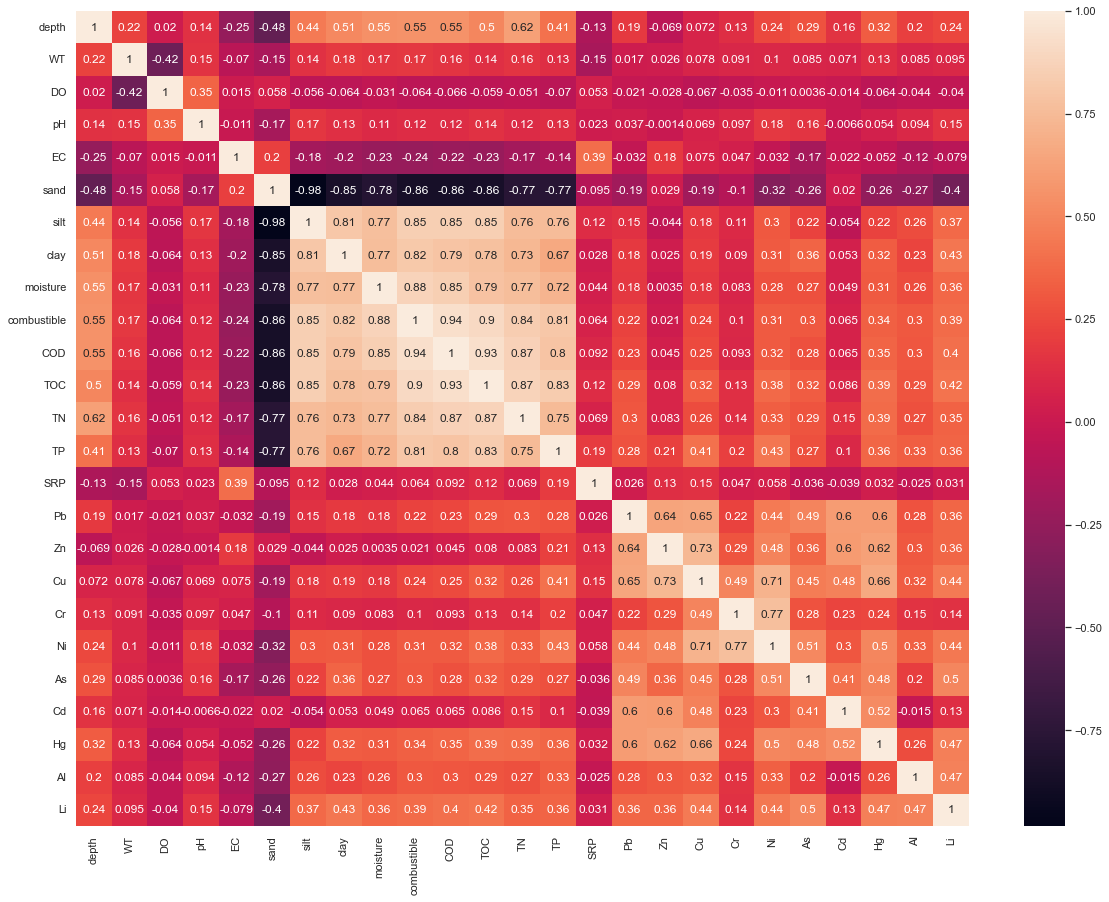

In [57]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(df, annot=True)